In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [13]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=2)

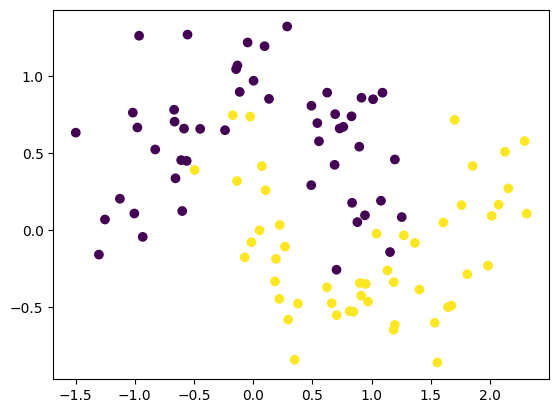

In [14]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [17]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2, kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.get_weights()

[array([[-1.5283626 ,  1.3064    ,  0.25990248,  0.7757455 , -0.57043624,
          0.5089544 , -1.2342215 ,  1.007966  , -0.5418297 ,  1.4725524 ],
        [-0.07969811, -1.2021769 ,  0.10407131,  0.82460046,  0.03776529,
         -1.0362855 , -0.3768437 , -0.24562085, -1.0537502 ,  1.0100282 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.5307344 , -0.28919142,  0.31076145,  0.49824277,  0.12106544,
         -0.10812016, -0.34807035, -0.19002952,  0.45135814,  0.11422051],
        [ 0.5870772 ,  0.14946795,  0.448786  ,  1.0102526 ,  0.03995414,
          0.16287282, -0.04726527,  0.8515826 ,  0.03229218, -0.17080122],
        [-0.2836281 ,  0.06684776,  0.6753998 ,  0.7825611 , -0.142409  ,
          0.09454692,  0.41081905,  0.48373336, -0.5092923 , -0.31016004],
        [-0.32723972, -0.87188154,  0.71361846, -0.2386877 , -0.2887012 ,
         -0.8952508 , -0.77400106,  0.03486585,  0.02296393,  0.5507726 ],
        [ 0.36214

In [19]:
initial_weights = model.get_weights()

In [21]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [22]:
model.set_weights(initial_weights)

In [23]:
model.get_weights()

[array([[-0.94372594,  0.53361905, -0.75974816,  0.66036105,  1.179331  ,
          0.3943653 , -0.09924765,  0.76618296,  0.42383847,  0.38436863],
        [ 0.1391684 ,  1.7716897 ,  0.14941664,  0.22840936, -0.03632079,
         -0.63889647, -0.4984291 ,  1.1404614 ,  0.09188047,  0.79212683]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.6405236 ,  0.03395139,  0.13635638,  0.3180928 , -0.2875825 ,
          0.11799685, -0.10145941,  0.05879192, -0.19355293,  0.14420241],
        [-0.10116643, -0.10923373,  0.0742064 ,  0.4368057 , -0.2525473 ,
         -0.20901076,  0.54504824, -0.16210158,  0.05028106,  0.05549259],
        [-0.08594423, -0.68712586, -0.18828148,  0.05115553,  0.1807532 ,
         -0.00282731, -0.22965969,  0.0313221 ,  0.12611058,  0.03294884],
        [ 0.16463116, -0.2573565 , -0.12444998,  0.13943191, -0.71394306,
         -0.01914404,  0.2028948 , -0.072358  ,  0.34509194,  0.0303549 ],
        [ 0.50974

In [25]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.5312 - loss: 0.6934 - val_accuracy: 0.3500 - val_loss: 0.6973
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4766 - loss: 0.6926 - val_accuracy: 0.3500 - val_loss: 0.6949
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5047 - loss: 0.6900 - val_accuracy: 0.4500 - val_loss: 0.6928
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6180 - loss: 0.6883 - val_accuracy: 0.4500 - val_loss: 0.6909
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6078 - loss: 0.6868 - val_accuracy: 0.5500 - val_loss: 0.6891
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6930 - loss: 0.6836 - val_accuracy: 0.8000 - val_loss: 0.6871
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7188 - loss: 0.6826 - val_accuracy: 0.8000 - val_loss: 0.6850
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6836 - loss: 0.6814 - val_accuracy: 0.8000 - val_loss

In [28]:
model.get_weights()

[array([[-1.2677464 ,  0.6292331 , -0.9312017 ,  0.83331114,  1.2528659 ,
          0.56781876,  0.09000679,  0.7235317 ,  0.6211746 ,  0.4630818 ],
        [ 0.27403927,  1.9006693 ,  0.09239936,  0.0053446 , -0.27106214,
         -0.80271345, -0.77002794,  1.2831941 , -0.04955578,  0.95035964]],
       dtype=float32),
 array([-0.0686313 ,  0.16458227, -0.08153181,  0.13801666, -0.03202986,
         0.09557764,  0.22037782,  0.12574553,  0.19249862,  0.16490248],
       dtype=float32),
 array([[-0.44344646,  0.02546291,  0.38549757,  0.5321619 , -0.2875825 ,
          0.35279122, -0.03147911,  0.33813003, -0.00631086,  0.04442301],
        [-0.2756767 , -0.10923373,  0.25757477,  0.57410204, -0.2525473 ,
         -0.07683277,  0.4063695 , -0.07239541,  0.0433461 , -0.04656639],
        [ 0.009822  , -0.68712586,  0.06812122,  0.2768709 ,  0.1807532 ,
          0.23325945, -0.1968235 ,  0.32275578,  0.31358892, -0.06376991],
        [ 0.21253702, -0.32637626,  0.01340106,  0.1887654 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step


<Axes: >

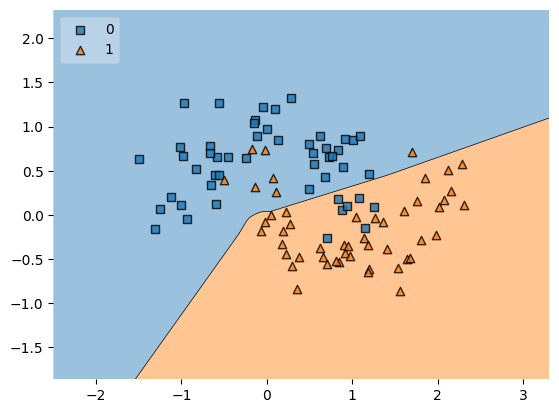

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [30]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.02534212508460295)

In [31]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.02244754482983485)